### Reuters dataset

* In this example we will work with the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. 
* It’s a simple, widely used toy dataset for text classification. 
* There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [1]:
from tensorflow.keras.datasets import reuters

2022-11-30 13:26:42.719814: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


### Decode newswires back to text

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Note that the indices are offset by 3 because 0, 1, and 2 are reserved 
# indices for “padding,” “start of sequence,” and “unknown.”
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 1us/step


### Encoding the data

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use **one-hot encoding**. **One-hot encoding** is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of
the label index.

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
# Note that there is a built-in way to do this in Keras:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))

# The last layer uses a softmax activation. 
# It means the network will output a probability distribution over the 46
# different output classes—for every input sample, the network will produce a 46-
# dimensional output vector, where output[i] is the probability that the sample
# belongs to class i. The 46 scores will sum to 1.
model.add(layers.Dense(46, activation='softmax'))



### Compile the model

In [18]:
# The best loss function to use in this case is categorical_crossentropy. 
# It measures the distance between two probability distributions: here, 
# between the probability distribution output by the network and the true 
# distribution of the labels. By minimizing the distance between these two distributions, 
# you train the network to output something as close as possible to the true labels.
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

### Validate

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Train

In [20]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 384us/sample - loss: 2.5720 - accuracy: 0.5387 - val_loss: 1.7141 - val_accuracy: 0.6330
Epoch 2/20
7982/7982 [==============================] - 1s 153us/sample - loss: 1.4028 - accuracy: 0.7016 - val_loss: 1.3138 - val_accuracy: 0.7030
Epoch 3/20
7982/7982 [==============================] - 1s 159us/sample - loss: 1.0469 - accuracy: 0.7711 - val_loss: 1.1369 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 137us/sample - loss: 0.8275 - accuracy: 0.8235 - val_loss: 1.0438 - val_accuracy: 0.7710
Epoch 5/20
7982/7982 [==============================] - 1s 119us/sample - loss: 0.6589 - accuracy: 0.8582 - val_loss: 0.9815 - val_accuracy: 0.7880
Epoch 6/20
7982/7982 [==============================] - 1s 118us/sample - loss: 0.5262 - accuracy: 0.8874 - val_loss: 0.9339 - val_accuracy: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 139us

### Plot the training and validation loss

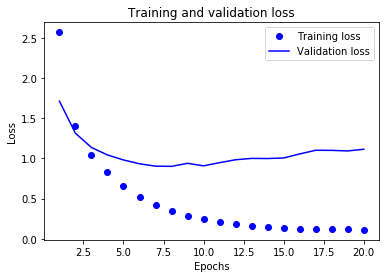

In [21]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot the training and validation accuracy

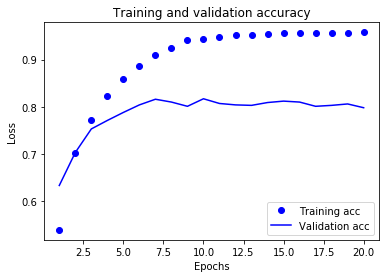

In [26]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retrain a model from scratch

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 200us/sample - loss: 2.5861 - accuracy: 0.5294 - val_loss: 1.7175 - val_accuracy: 0.6310
Epoch 2/9
7982/7982 [==============================] - 1s 170us/sample - loss: 1.4287 - accuracy: 0.7065 - val_loss: 1.3425 - val_accuracy: 0.7270
Epoch 3/9
7982/7982 [==============================] - 1s 141us/sample - loss: 1.0719 - accuracy: 0.7754 - val_loss: 1.1603 - val_accuracy: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 126us/sample - loss: 0.8381 - accuracy: 0.8236 - val_loss: 1.0605 - val_accuracy: 0.7840
Epoch 5/9
7982/7982 [==============================] - 1s 123us/sample - loss: 0.6597 - accuracy: 0.8604 - val_loss: 0.9826 - val_accuracy: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 150us/sample - loss: 0.5256 - accuracy: 0.8890 - val_loss: 0.9508 - val_accuracy: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 172us/sample

[1.0175312144991975, 0.7853963]


### Predict

In [30]:
predictions = model.predict(x_test)
# print(predictions)
# The largest entry is the predicted class—the class with the highest probability:
np.argmax(predictions[0])

3

### Example Takeaways: 
* If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
* In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.
* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification:
    * Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
    * Encoding the labels as integers and using the sparse_categorical_crossentropy loss function
* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.